In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### READING THE FILE 

In [8]:
data=pd.read_csv('Iris.csv')
df=data.copy()
df.drop(['Id','SepalLengthCm','SepalWidthCm','Species'],axis=1,inplace=True)
ds=df.copy()

### IMPLEMENTING SCALING OUR DATA

In [10]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
ds['PetalLengthCm']=mm.fit_transform(ds[['PetalLengthCm']])
ds['PetalWidthCm']=mm.fit_transform(ds[['PetalWidthCm']])


### SCATTER PLOT TO KNOW THE DISTRIBUTION 

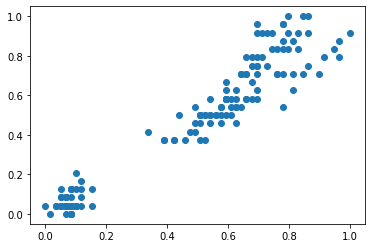

In [12]:
plt.scatter(ds['PetalLengthCm'],ds['PetalWidthCm'])

In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_pred1=km.fit_predict(ds[['PetalLengthCm','PetalWidthCm']])

In [43]:
ds['cluster']=y_pred1
ds1=ds[ds.cluster==0]
ds2=ds[ds.cluster==1]



### PLOTTING THE SCATTER PLOT USING K VALUE OF 2

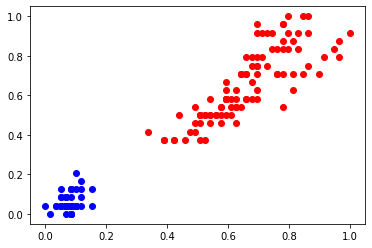

In [44]:
plt.scatter(ds1['PetalLengthCm'],ds1['PetalWidthCm'],color='blue')
plt.scatter(ds2['PetalLengthCm'],ds2['PetalWidthCm'],color='red')


### FINDING THE OPTIMUM K VALUE USING ELBOW CURVE 

In [31]:
k_values=np.arange(1,10)
sse=[]
for k in k_values:
    kmm=KMeans(n_clusters=k)
    kmm.fit(ds[['PetalLengthCm','PetalWidthCm']])
    sse.append(kmm.inertia_)
sse

[28.391514358368713,
 5.179687509974784,
 1.7050986081225126,
 1.1621031930971282,
 0.856792242464423,
 0.6833274904190354,
 0.5683512655008138,
 0.48903237532185284,
 0.41635853312825166]

Text(0, 0.5, 'sum of squared errors')

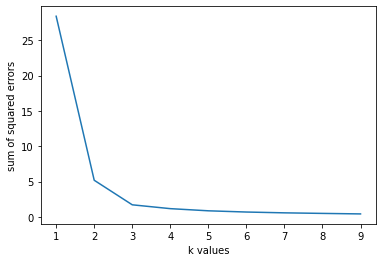

In [32]:
plt.plot(k_values,sse)
plt.xlabel('k values')
plt.ylabel('sum of squared errors')

### IMPLEMENTING K MEANS ALGORITHM USING K VALUE OF 3 


In [36]:
from sklearn.cluster import KMeans
kmm=KMeans(n_clusters=3)
y_pred2=kmm.fit_predict(ds[['PetalLengthCm','PetalWidthCm']])

In [39]:
ds['cluster']=y_pred2
ds3=ds[ds.cluster==0]
ds4=ds[ds.cluster==1]
ds5=ds[ds.cluster==2]

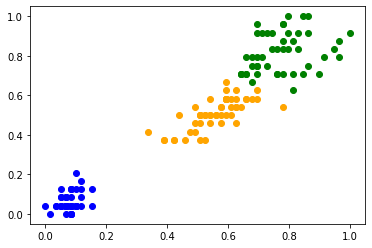

In [48]:
plt.scatter(ds3['PetalLengthCm'],ds3['PetalWidthCm'],color='ORANGE')
plt.scatter(ds4['PetalLengthCm'],ds4['PetalWidthCm'],color='BLUE')
plt.scatter(ds5['PetalLengthCm'],ds5['PetalWidthCm'],color='green')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

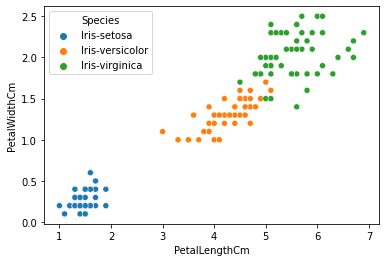

In [45]:
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Species'])